# Machine Learning
Assignment 01: Data Pre processing

## Step 01: Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Step 02: Loading the dataset

In [2]:
def load_data(file_path):
    return pd.read_csv(file_path)

data = load_data("titanic_data.csv")
data.shape

(418, 12)

In [3]:
# Identify numeric and categorical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("Columns:", data.columns)
print("Numeric Columns:", numeric_cols)
print("Categorical Column:", categorical_cols)

Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Numeric Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categorical Column: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Step 03: Data Cleaning

### 01: Remove duplicates

In [7]:
print("Duplicate rows", data.duplicated().sum())
if data.duplicated().sum() > 0:
    data = data.drop_duplicates()

Duplicate rows 0


### 02: Missing Value Analysis

In [8]:
def missing_value_analysis(data):
    print("=== Missing Value Analysis ===")
    
    # Check for duplicates
    duplicates = data.duplicated().sum()
    print(f"\nNumber of duplicate rows: {duplicates}")
    data = data.drop_duplicates()
    
    # Missing values analysis
    missing_values = data.isnull().sum()
    missing_percentages = (missing_values / len(data)) * 100
    
    missing_df = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage': missing_percentages
    })
    print("\nMissing Values Summary:")
    print(missing_df[missing_df['Missing Values'] > 0])
    
    # Handle missing values
    # Age: Fill with median by passenger class
    for pclass in [1, 2, 3]:
        median_age = data[data['Pclass'] == pclass]['Age'].median()
        data.loc[(data['Age'].isna()) & 
                        (data['Pclass'] == pclass), 'Age'] = median_age
    
    # Fare: Fill with median by passenger class
    data['Fare'] = data.groupby('Pclass')['Fare'].transform(
        lambda x: x.fillna(x.median()))
    
    # Embarked: Fill with mode
    data['Embarked'] = data['Embarked'].fillna(
        data['Embarked'].mode()[0])
    
    # Cabin: Create 'Unknown' category for missing values
    data['Cabin'] = data['Cabin'].fillna('Unknown')
    
    return data, missing_df

data, missing_df = missing_value_analysis(data)
print(data.head())

=== Missing Value Analysis ===

Number of duplicate rows: 0

Missing Values Summary:
       Missing Values  Percentage
Age                86   20.574163
Fare                1    0.239234
Cabin             327   78.229665
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare    Cabin Embarked  
0   330911   7.8292  Unknown        Q  
1   363

### 03: Categorical Encoding

In [9]:
def categorical_encoding(data):
        # Label Encoding
        le = LabelEncoder()
        
        for col in categorical_cols:
            if col in data.columns:
                data[f'{col}_encoded'] = le.fit_transform(data[col].astype(str))
        
        return data

data = categorical_encoding(data)
print(data.head())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare    Cabin Embarked  Name_encoded  Sex_encoded  \
0   330911   7.8292  Unknown        Q           206            1   
1   363272   7.0000  Unknown        S           403            0   
2   240276   9.6875  Unknown        Q           269            1   
3   315154   8.6625  Unknown        

### 04: Feature Scaling

In [10]:

def feature_scaling(data):
        scaler = StandardScaler()
        
        # Create scaled versions of numeric columns
        for col in numeric_cols:
            if col in data.columns:
                data[f'{col}_scaled'] = scaler.fit_transform(data[[col]])
        
        return data

data = feature_scaling(data)
# Display the data to visualize changes
print(data.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare  ... Ticket_encoded Cabin_encoded  Embarked_encoded  \
0   330911   7.8292  ...            152            76                 1   
1   363272   7.0000  ...            221            76                 2   
2   240276   9.6875  ...             73            76                 1   
3   3151

### 05: Feature Engineering

In [11]:
def feature_engineering(data):
    # 1. Family Size Processing
    data['family_size'] = data['SibSp'] + data['Parch'] + 1
    data['family_category'] = pd.cut(
        data['family_size'],
        bins=[0, 1, 4, 7, np.inf],
        labels=['Solo', 'Small', 'Medium', 'Large']
    )
    
    # 2. Age Processing
    data['age_group'] = pd.cut(
        data['Age'],
        bins=[0, 12, 30, 50, np.inf],
        labels=['Child', 'Young_Adult', 'Adult', 'Elderly']
    )
    
    # 3. Fare Processing
    data['fare_per_person'] = data['Fare'] / data['family_size']
    data['fare_category'] = pd.qcut(
        data['Fare'],
        q=4,
        labels=['Low', 'Medium', 'High', 'Very_High']
    )
    
    # 4. Name Title Processing
    data['title'] = data['Name'].str.extract(
        ' ([A-Za-z]+)\\.', expand=False)
    title_mapping = {
        'Mr': 'Mr',
        'Miss': 'Miss',
        'Mrs': 'Mrs',
        'Master': 'Master',
        'Dr': 'Rare',
        'Rev': 'Rare',
        'Col': 'Rare',
        'Major': 'Rare',
        'Mlle': 'Miss',
        'Countess': 'Rare',
        'Ms': 'Miss',
        'Lady': 'Rare',
        'Sir': 'Rare',
        'Mme': 'Mrs',
        'Don': 'Rare',
        'Capt': 'Rare',
        'Jonkheer': 'Rare'
    }
    data['title'] = data['title'].map(title_mapping)
    
    # 5. Cabin Processing
    data['deck'] = data['Cabin'].str.extract('([A-Z])', expand=False)
    data['has_cabin'] = data['Cabin'].notna().astype(int)
    data['deck'] = data['deck'].fillna('Unknown')
    data.loc[~data['deck'].isin(
        ['A', 'B', 'C', 'D', 'E', 'F']), 'deck'] = 'Other'
    
    return data

data = feature_engineering(data)
# Display the data to visualize changes
print(data.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare  ... Parch_scaled Fare_scaled  family_size  \
0   330911   7.8292  ...    -0.400248   -0.497071            1   
1   363272   7.0000  ...    -0.400248   -0.511934            2   
2   240276   9.6875  ...    -0.400248   -0.463762            1   
3   315154   8.6625  ...    -0.400248   -0.4

## Step : 04 Data visualization

### 01. Missing Values Visualization

Text(0, 0.5, 'Percentage')

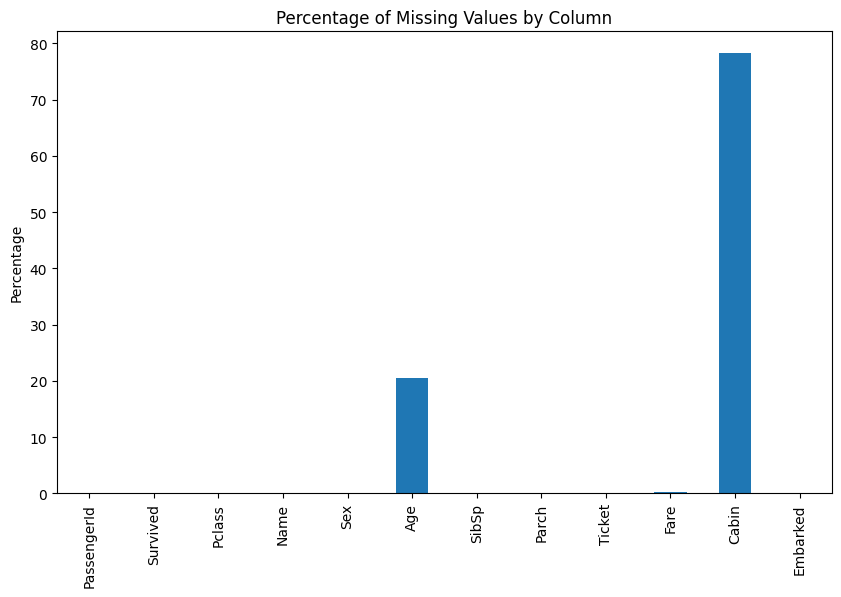

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
missing = missing_df['Percentage']
missing.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage')

### 02. Age Distribution Analysis

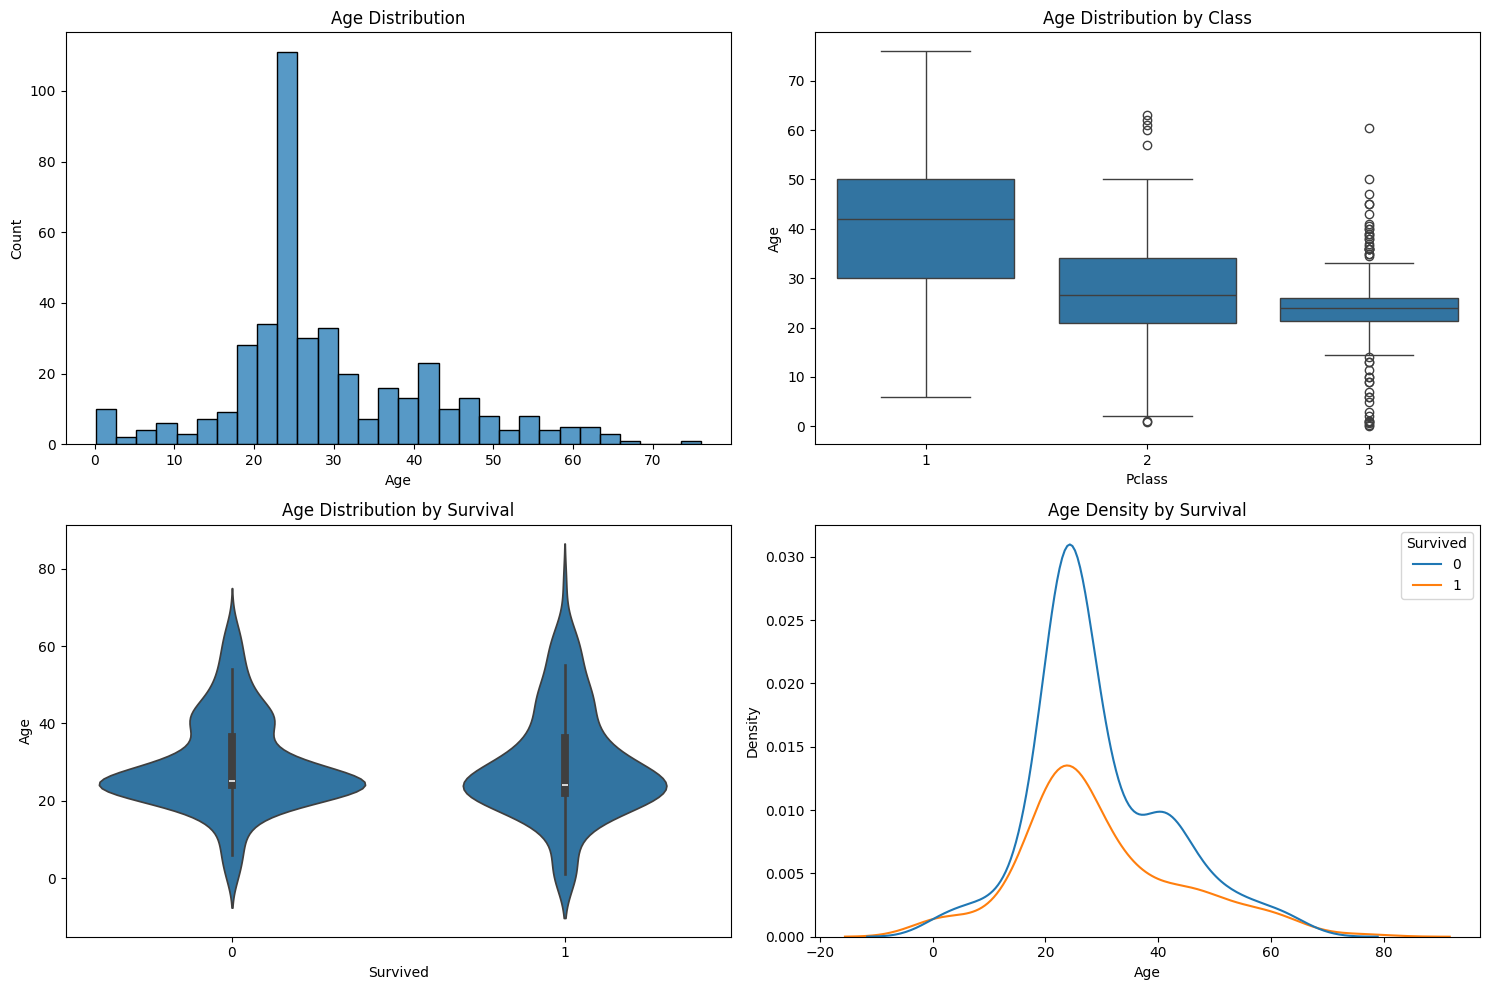

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
sns.histplot(data=data, x='Age', bins=30, ax=ax1)
ax1.set_title('Age Distribution')

# Box plot by class
sns.boxplot(data=data, x='Pclass', y='Age', ax=ax2)
ax2.set_title('Age Distribution by Class')

# Violin plot by survival
sns.violinplot(data=data, x='Survived', y='Age', ax=ax3)
ax3.set_title('Age Distribution by Survival')

# KDE plot by survival
sns.kdeplot(data=data, x='Age', hue='Survived', ax=ax4)
ax4.set_title('Age Density by Survival')

plt.tight_layout()

### 03. Fare Analysis

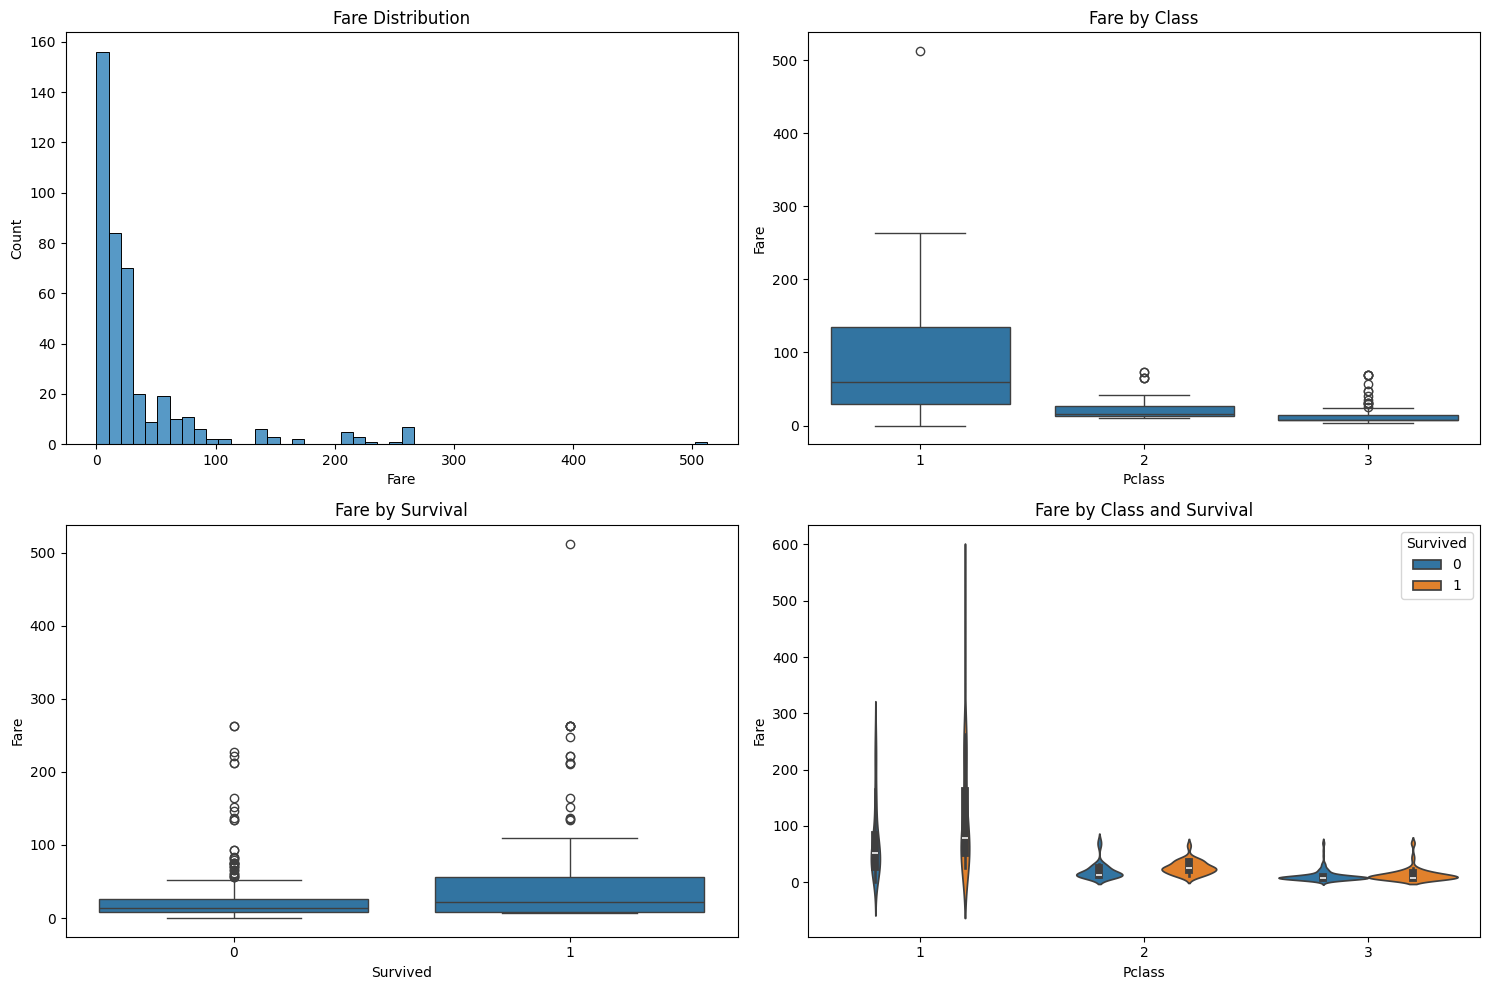

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
sns.histplot(data=data, x='Fare', bins=50, ax=ax1)
ax1.set_title('Fare Distribution')

# Box plot by class
sns.boxplot(data=data, x='Pclass', y='Fare', ax=ax2)
ax2.set_title('Fare by Class')

# Box plot by survival
sns.boxplot(data=data, x='Survived', y='Fare', ax=ax3)
ax3.set_title('Fare by Survival')

# Violin plot by class and survival
sns.violinplot(data=data, x='Pclass', y='Fare', hue='Survived', ax=ax4)
ax4.set_title('Fare by Class and Survival')

plt.tight_layout()

### 04. Categorical Variables Analysis

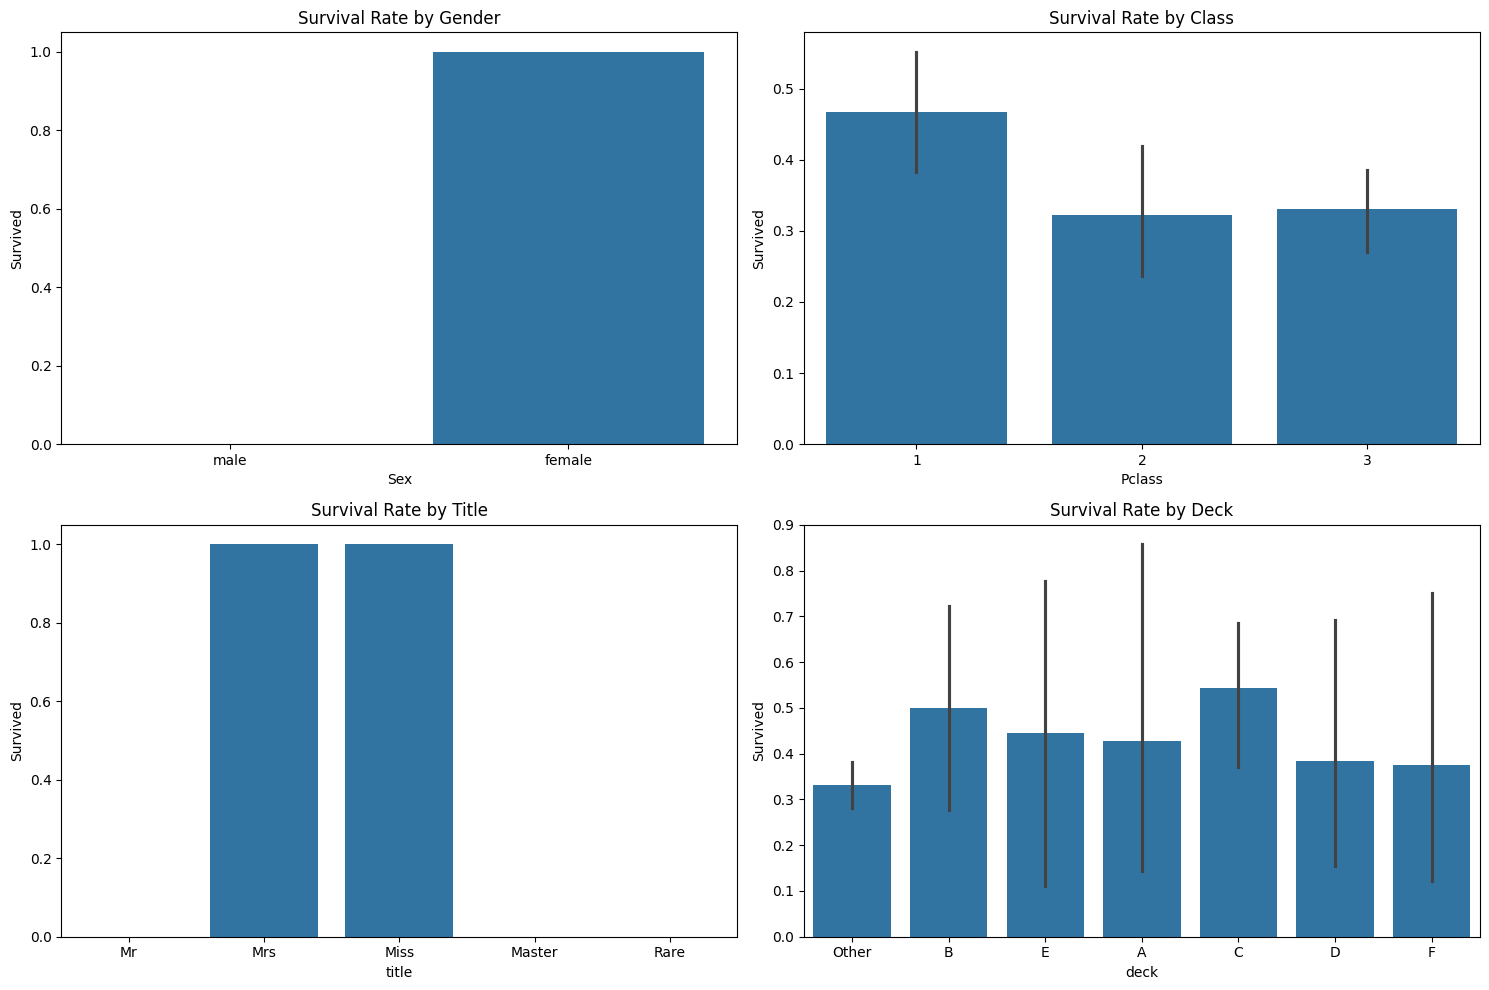

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Survival by sex
sns.barplot(data=data, x='Sex', y='Survived', ax=ax1)
ax1.set_title('Survival Rate by Gender')

# Survival by class
sns.barplot(data=data, x='Pclass', y='Survived', ax=ax2)
ax2.set_title('Survival Rate by Class')

# Survival by title
sns.barplot(data=data, x='title', y='Survived', ax=ax3)
ax3.set_title('Survival Rate by Title')

# Survival by deck
sns.barplot(data=data, x='deck', y='Survived', ax=ax4)
ax4.set_title('Survival Rate by Deck')

plt.tight_layout()

### 05. Correlation Analysis

Text(0.5, 1.0, 'Correlation Matrix of Numeric Variables')

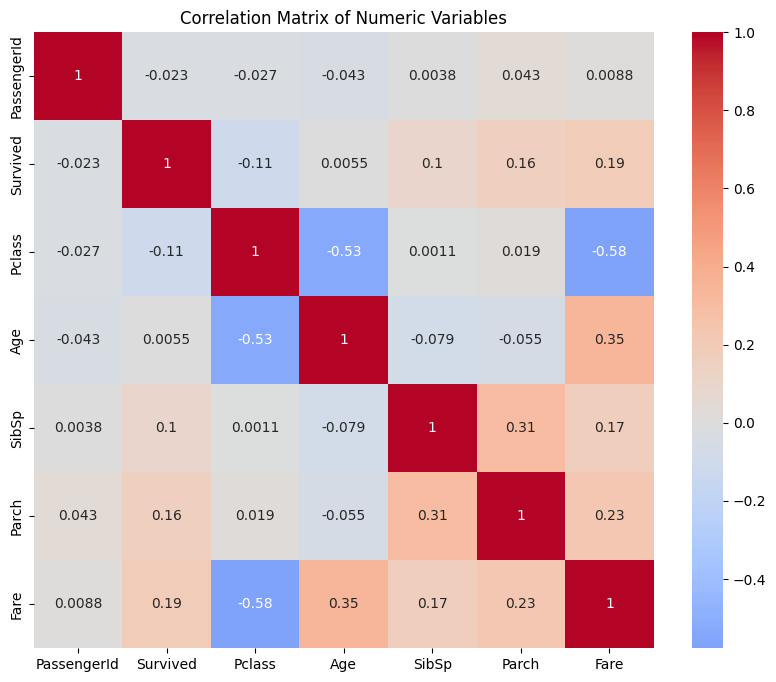

In [16]:
correlation_matrix = data[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')